In [1]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

# results from glmnet
df = pd.read_csv('result.csv')
df.head()

,y_true,y_pred,y_pred_new
0,25.8,21.193469,18.812968
1,19.1,26.006870,25.185983
2,33.8,20.050668,19.532291
3,6.8,15.009204,15.202038
4,19.8,18.823345,17.541071


### glmnet results

In [2]:
y_true = df['y_true'].tolist()
y_pred = df['y_pred'].tolist()
y_pred_new = df['y_pred_new'].tolist()

print('all features')
print("mean_absolute_error:", mean_absolute_error(y_true, y_pred))
print("mean_squared_error:", mean_squared_error(y_true, y_pred))
print("rmse:", sqrt(mean_squared_error(y_true, y_pred)))
print("r2 score:", r2_score(y_true, y_pred))

all features
mean_absolute_error: 3.8995510175513357
mean_squared_error: 24.155061514191996
rmse: 4.9147799049593255
r2 score: 0.6050361706371141


In [3]:
print('fewer features')
print("mean_absolute_error:", mean_absolute_error(y_true, y_pred_new))
print("mean_squared_error:", mean_squared_error(y_true, y_pred_new))
print("rmse:", sqrt(mean_squared_error(y_true, y_pred_new)))
print("r2 score:", r2_score(y_true, y_pred_new))

fewer features
mean_absolute_error: 3.861754871306264
mean_squared_error: 23.366692297989488
rmse: 4.833910663012866
r2 score: 0.6179269399030178


### naive linear regression results

In [4]:
train = pd.read_csv('Train.csv', index_col = 0)
test = pd.read_csv('Test.csv', index_col = 0)


baseline = LinearRegression().fit(train.iloc[:, 2:4], train.iloc[:, -1])
y_pred1 = baseline.predict(test.iloc[:, 2:4])

print("mean_absolute_error:", mean_absolute_error(y_true, y_pred1))
print("mean_squared_error:", mean_squared_error(y_true, y_pred1))
print("rmse:", sqrt(mean_squared_error(y_true, y_pred1)))
print("r2 score:", r2_score(y_true, y_pred1))

mean_absolute_error: 4.850437940385653
mean_squared_error: 38.15628117998013
rmse: 6.177077074149239
r2 score: 0.3760996667204687


In [5]:
baseline.coef_

array([ 5.7907478 , -2.32955448])

### Residual Plots

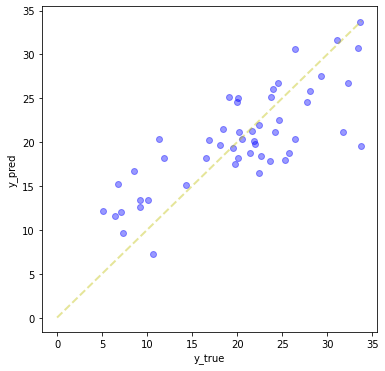

In [6]:
plt.figure(figsize = (6, 6))
plt.scatter(y_true, y_pred_new, c = 'blue', alpha = 0.4)
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([0, max(y_true + y_pred_new)], [0, max(y_true + y_pred_new)], linestyle='--', lw=2, color='y', alpha = 0.4)

In [7]:
# Residual diagnosis
et = [(y_true[i] - y_pred_new[i]) for i in range(len(y_true))]
print(max(et), min(et))

14.267708534740997 -9.103839859635798


Text(0, 0.5, 'e_(t+1)')

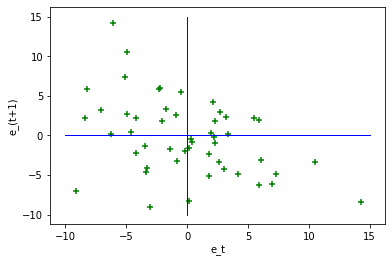

In [8]:
plt.figure(figsize = (6, 4))
plt.plot([-10,15],[0,0],'b',linewidth=1)
plt.plot([0,0],[-10,15],'b',linewidth=1)
et_1 = et[1:]
et_0 = et[:-1]
plt.scatter(et_0, et_1, marker = '+', color = 'g')
plt.xlabel('e_t')
plt.ylabel('e_(t+1)')

((array([-2.21154155, -1.84175131, -1.62365924, -1.46329903, -1.33363779,
         -1.22318558, -1.1259265 , -1.03829303, -0.95798431, -0.88342315,
         -0.81347686, -0.74730127, -0.68424773, -0.62380483, -0.5655602 ,
         -0.50917466, -0.45436405, -0.40088629, -0.34853176, -0.29711609,
         -0.24647455, -0.19645772, -0.14692788, -0.09775611, -0.0488197 ,
          0.        ,  0.0488197 ,  0.09775611,  0.14692788,  0.19645772,
          0.24647455,  0.29711609,  0.34853176,  0.40088629,  0.45436405,
          0.50917466,  0.5655602 ,  0.62380483,  0.68424773,  0.74730127,
          0.81347686,  0.88342315,  0.95798431,  1.03829303,  1.1259265 ,
          1.22318558,  1.33363779,  1.46329903,  1.62365924,  1.84175131,
          2.21154155]),
  array([-9.10383986, -8.40203846, -8.24452392, -7.07123371, -6.26815646,
         -6.08598251, -5.12555865, -4.93876095, -4.89563051, -4.57981309,
         -4.22134933, -4.16349603, -3.42142315, -3.37996364, -3.2855165 ,
         -3.04

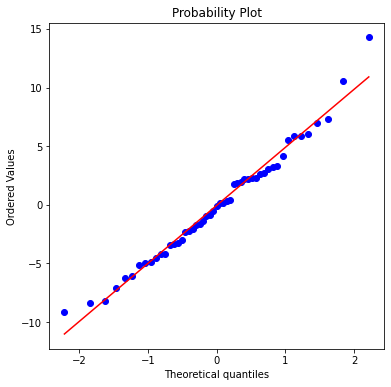

In [9]:
plt.figure(figsize = (6, 6))
stats.probplot(et, dist = 'norm', plot = plt)    